In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
df = pd.read_csv('~/Downloads/BIKEEXTEND-Healthhistorydemos_DATA_LABELS_2025-03-22_2016.csv')
df.columns = df.columns.str.replace(' ', '_')
df.head()


NameError: name 'pd' is not defined

In [ ]:
filepath = '../../../../fsf/job/lists/extend_subject_list.txt'
with open(filepath, "r") as file:
    subject_list = [line.strip().replace("sub-", "") for line in file if line.strip()]

In [ ]:
matches = df['EXTEND_Study_ID'].astype(str).isin(subject_list)
print("Matches found:", matches.sum())

Matches found: 0


In [ ]:

import pandas as pd

def filter_by_subject_list(df, subject_list, ID_column='EXTEND_Study_ID'):
    """
    Filters the DataFrame to only include rows where the 'EXTEND Study ID' 
    is found in the subject list (with 'sub-' prefix removed) from a text file.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        file_path (str): Path to the subject list text file.
        
    Returns:
        pd.DataFrame: Filtered DataFrame.
    """
    # Ensure IDs in DataFrame are strings for comparison
    df[ID_column] = df[ID_column].astype('Int64').astype(str)

    # Filter based on cleaned subject list
    filtered_df = df[df[ID_column].isin(subject_list)]
    
    return filtered_df

df_filtered = filter_by_subject_list(df, subject_list)
df_filtered

,Record_ID,EXTEND_Study_ID,Date_Administered,Have_you_ever_smoked?,When_did_you_quit?,How_many_cigarettes_did_you_smoke_per_day?,How_many_years_have_you_smoked?,Have_you_used_any_other_type_of_tobacco?,Do_you_drink_alcohol?,"How_many_glasses_of_alcohol_do_you_drink_each_week_for_the_past_year?_(e.g.,_12_oz._beer,_8_oz_wine,_5_oz._spirits)",...,Please_describe:,How_would_you_describe_yourself?,Sex_assigned_at_birth,Which_gender_identity_do_you_most_identify_with?,Please_Describe:.1,Years_of_Education,What_is_the_highest_degree_or_level_of_school_your_parents/guardians_completed?,MoCA_Score,Study_Complete?,Complete?.1
1,2,2002,2018-05-22,No,NaN,NaN,NaN,No,Yes,0.5,...,NaN,Not Hispanic or Latino,Female,Female,NaN,14.0,Graduated College with 2 yr Degree or Vocation...,27.0,No,Complete
19,20,2020,2018-06-07,No,NaN,NaN,NaN,No,Yes,0.0,...,NaN,Not Hispanic or Latino,Female,Female,NaN,13.0,Some College but did not Graduate,25.0,No,Complete
40,41,2041,2018-06-18,Yes,1974.0,20.0,20.0,No,Yes,1.0,...,NaN,Not Hispanic or Latino,Female,NaN,NaN,17.0,NaN,27.0,No,Complete
41,42,2042,2018-06-21,No,NaN,NaN,NaN,No,Yes,8.0,...,NaN,Not Hispanic or Latino,Female,Female,NaN,15.0,Graduated College with 2 yr Degree or Vocation...,24.0,No,Complete
52,53,2053,2018-07-06,Yes,1984.0,40.0,10.0,Yes,Yes,2.5,...,NaN,Not Reported,Male,NaN,NaN,16.0,NaN,NaN,NaN,Complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,842,2842,2022-08-22,No,NaN,NaN,NaN,No,Yes,2.0,...,NaN,Not Hispanic or Latino,Female,Female,NaN,16.0,Graduate Degree,29.0,NaN,Incomplete
845,846,2846,2022-08-24,No,NaN,NaN,NaN,No,Yes,2.0,...,NaN,Not Hispanic or Latino,Female,Female,NaN,18.0,Graduated High School,30.0,NaN,Incomplete
858,859,2859,2022-08-30,No,NaN,NaN,NaN,No,No,NaN,...,NaN,Not Hispanic or Latino,Female,Female,NaN,21.0,Graduated High School,28.0,NaN,Incomplete
860,861,2861,2022-08-31,No,NaN,NaN,NaN,No,Yes,1.0,...,NaN,Not Hispanic or Latino,Male,Male,NaN,18.0,Graduate Degree,26.0,NaN,Complete


In [ ]:
e_fdf = df_filtered[['EXTEND_Study_ID','Have_you_ever_smoked?','How_many_glasses_of_alcohol_do_you_drink_each_week_for_the_past_year?_(e.g.,_12_oz._beer,_8_oz_wine,_5_oz._spirits)','Any_weight_gain_(+/-_10_lbs.)_in_the_last_12_months?','Any_weight_loss_(+/-_10_lbs.)_in_the_last_12_months?','Diabetes?','Hypertension_(high_blood_pressure)?','High_cholesterol?.1','Heart_disease_(heart_attack,_angioplasty,_bypass_surgery,_angina)?']]
e_fdf

,EXTEND_Study_ID,Have_you_ever_smoked?,"How_many_glasses_of_alcohol_do_you_drink_each_week_for_the_past_year?_(e.g.,_12_oz._beer,_8_oz_wine,_5_oz._spirits)",Any_weight_gain_(+/-_10_lbs.)_in_the_last_12_months?,Any_weight_loss_(+/-_10_lbs.)_in_the_last_12_months?,Diabetes?,Hypertension_(high_blood_pressure)?,High_cholesterol?.1,"Heart_disease_(heart_attack,_angioplasty,_bypass_surgery,_angina)?"
1,2002,No,0.5,No,No,No,Yes,Yes,NaN
19,2020,No,0.0,Yes,No,NaN,Yes,Yes,Yes
40,2041,Yes,1.0,No,No,No,Yes,No,Yes
41,2042,No,8.0,No,No,No,Yes,No,No
52,2053,Yes,2.5,No,No,Yes,NaN,NaN,Yes
...,...,...,...,...,...,...,...,...,...
841,2842,No,2.0,No,No,Yes,No,Yes,No
845,2846,No,2.0,No,No,Yes,No,Yes,Yes
858,2859,No,NaN,No,No,No,Yes,No,No
860,2861,No,1.0,No,No,Yes,No,Yes,No


In [ ]:
pdf = pd.read_csv('~/Downloads/PACR-Demoshealthhistory_DATA_LABELS_2025-03-22_2113.csv')
pdf.columns = pdf.columns.str.replace(' ', '_')
pdf.head()

,Lab_ID,PACR_Study_ID#:,Complete?,Date_of_Examination,Height_(inches),Weight_(lbs.),bmi,Date_of_Resting_BP/HR_1,SYS,DIAS,...,Peripheral_artery_disease?.1,"If_yes,_who?.6",High_cholesterol?.1,"If_yes,_who?.7",Are_you_willing_to_fast_overnight_for_8_hours?,Do_any_of_your_morning_medications_require_food?,Are_you_comfortable_with_needles_and_having_your_blood_drawn?,"If_no,_please_describe:",Are_you_willing_to_record_your_diet_for_3_days?,Complete?.3
0,1,15,Complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
1,44,8,Complete,2015-07-31,59.0,175.0,35.341856,2015-07-31,138.0,94.0,...,No,NaN,Yes,NaN,Yes,No,Yes,NaN,Yes,Complete
2,45,41,Complete,2015-07-08,63.5,185.0,32.253705,2015-07-08,131.0,80.0,...,No,NaN,No,NaN,Yes,No,Yes,NaN,Yes,Complete
3,58,25,Complete,2015-06-30,72.5,193.2,25.839639,2015-06-30,126.0,72.0,...,No,NaN,No,NaN,Yes,No,Yes,NaN,Yes,Complete
4,68,12,Complete,2015-06-15,65.0,180.6,30.050130,2015-06-15,100.0,64.0,...,No,NaN,Yes,mother,Yes,No,Yes,NaN,Yes,Complete


In [ ]:
filepath = '../../../../fsf/job/lists/pacr_subject_list.txt'
import re
with open(filepath, "r") as file:
    subject_list = [line.strip().replace("sub-", "") for line in file if line.strip()]
    numbers_only = [re.sub(r'\D', '', s) for s in subject_list]
    subject_list = numbers_only
subject_list = [str(int(i)) for i in subject_list]
subject_list

['140',
 '154',
 '159',
 '161',
 '164',
 '166',
 '185',
 '190',
 '197',
 '204',
 '206',
 '6',
 '7',
 '13',
 '24',
 '31',
 '39',
 '44',
 '45',
 '51',
 '52',
 '65',
 '76',
 '78',
 '83',
 '86',
 '87',
 '92',
 '104',
 '113',
 '5',
 '132',
 '136',
 '146',
 '158',
 '174',
 '176',
 '178',
 '182',
 '191',
 '195',
 '199',
 '209',
 '8',
 '9',
 '10',
 '11',
 '12',
 '25',
 '43',
 '55',
 '56',
 '66',
 '74',
 '77',
 '89',
 '98',
 '102',
 '110']

In [ ]:
pdf = pdf[pdf['PACR_Study_ID#:'].astype(str).str.match(r'\d+$')]
filtered_pdf = filter_by_subject_list(pdf, subject_list, ID_column='PACR_Study_ID#:')
filtered_pdf

,Lab_ID,PACR_Study_ID#:,Complete?,Date_of_Examination,Height_(inches),Weight_(lbs.),bmi,Date_of_Resting_BP/HR_1,SYS,DIAS,...,Peripheral_artery_disease?.1,"If_yes,_who?.6",High_cholesterol?.1,"If_yes,_who?.7",Are_you_willing_to_fast_overnight_for_8_hours?,Do_any_of_your_morning_medications_require_food?,Are_you_comfortable_with_needles_and_having_your_blood_drawn?,"If_no,_please_describe:",Are_you_willing_to_record_your_diet_for_3_days?,Complete?.3
1,44,8,Complete,2015-07-31,59.0,175.0,35.341856,2015-07-31,138.0,94.0,...,No,NaN,Yes,NaN,Yes,No,Yes,NaN,Yes,Complete
3,58,25,Complete,2015-06-30,72.5,193.2,25.839639,2015-06-30,126.0,72.0,...,No,NaN,No,NaN,Yes,No,Yes,NaN,Yes,Complete
4,68,12,Complete,2015-06-15,65.0,180.6,30.050130,2015-06-15,100.0,64.0,...,No,NaN,Yes,mother,Yes,No,Yes,NaN,Yes,Complete
5,87,7,Complete,2015-06-16,69.0,144.4,21.321823,2015-06-16,123.0,76.0,...,No,NaN,No,NaN,Yes,No,No,"""veins not easy""",Yes,Complete
6,92,9,Complete,2015-07-08,69.5,185.0,26.925107,2015-07-08,151.0,79.0,...,No,NaN,Yes,didn't answer,Yes,No,Yes,NaN,Yes,Complete
7,157,51,Complete,2015-08-12,65.0,165.2,27.487716,2015-08-12,128.0,72.0,...,No,NaN,Yes,didn't indicate,Yes,No,Yes,NaN,Yes,Complete
8,182,31,Complete,2015-06-30,70.0,180.6,25.910571,2015-06-30,110.0,76.0,...,NaN,NaN,NaN,NaN,Yes,No,Yes,NaN,Yes,Complete
9,200,13,Complete,2015-06-29,64.0,128.0,21.968750,2015-06-29,109.0,76.0,...,No,NaN,Yes,NaN,Yes,No,Yes,NaN,Yes,Complete
10,201,6,Complete,2015-06-17,67.5,178.6,27.556829,2015-06-17,125.0,82.0,...,No,NaN,Yes,mother - adult life,Yes,No,No,NaN,Yes,Complete
11,207,11,Complete,2015-06-23,65.5,121.2,19.859822,2015-06-23,109.0,59.0,...,No,NaN,Yes,"father, mother, brother",Yes,No,Yes,NaN,Yes,Complete


In [ ]:
filtered_pdf = filtered_pdf[['PACR_Study_ID#:','Have_you_ever_smoked?','How_many_glasses_of_alcohol_do_you_drink_each_week_for_the_past_year?_(e.g.,_12_oz_beer,_8_oz_wine,_5_oz_spirits)','Any_weight_gain_(+/-_10_lbs)_the_last_12_months?','Any_weight_loss_(+/-_10_lbs)_in_the_last_12_months?','Diabetes?','Hypertension_(high_blood_pressure)?','High_cholesterol?.1','Heart_disease_(heart_attack,_angioplasty,_bypass_surgery,_angina)?']]
p_fdf = filtered_pdf
p_fdf

,PACR_Study_ID#:,Have_you_ever_smoked?,"How_many_glasses_of_alcohol_do_you_drink_each_week_for_the_past_year?_(e.g.,_12_oz_beer,_8_oz_wine,_5_oz_spirits)",Any_weight_gain_(+/-_10_lbs)_the_last_12_months?,Any_weight_loss_(+/-_10_lbs)_in_the_last_12_months?,Diabetes?,Hypertension_(high_blood_pressure)?,High_cholesterol?.1,"Heart_disease_(heart_attack,_angioplasty,_bypass_surgery,_angina)?"
1,8,Yes,1.0,No,No,No,No,Yes,No
3,25,Yes,14.0,No,Yes,No,No,No,No
4,12,Yes,NaN,No,No,No,Yes,Yes,No
5,7,No,NaN,No,Yes,Yes,Yes,No,No
6,9,Yes,10.0,No,No,No,Yes,Yes,Yes
7,51,Yes,3.0,No,No,No,No,Yes,Yes
8,31,Yes,NaN,No,No,No,NaN,NaN,Yes
9,13,Yes,3.0,No,No,No,Yes,Yes,No
10,6,Yes,14.0,No,Yes,No,No,Yes,No
11,11,Yes,1.0,No,Yes,Yes,No,Yes,Yes


In [ ]:
bdf = pd.read_csv('~/Downloads/BETTER Aging Data for Zak Gilliam(medhx).csv')
bdf

,Study Subject ID,Subject Status,Subject Screening Number,Site Name,Event Name(Occurrence),Event Status,Medical History Form PDF:,1. Do you have any vision or ocular problems?,"a. If Yes, please explain:",b. Does it interfere with your daily activities?,...,31. Do you currently live in an/a:,32. Do you require assistance with your day-to-day activities?,"33. Do you have a caregiver to assist with your daily activities (dressing, personal hygiene, etc.)?","a. If Yes, how often did the caregiver come? Visit/Week:","b. If Yes, how often did the caregiver come? Hours/Week:",34. Are there any other physical or mental conditions that you'd like to mention that we haven't discussed?,"a. If Yes, specify:",b. Do any of the conditions you've mentioned interfere with your daily activities?,"i. If Yes, describe:",Medical History_complete
0,120001,Enrolled,120001,University of Iowa,Screening Visit (V0),Monitoring Completed,Medications_001.pdf,False,NaN,False,...,Home Un-Assisted environment,False,False,NaN,NaN,False,NaN,NaN,NaN,Monitoring Completed
1,120002,Enrolled,120002,University of Iowa,Screening Visit (V0),Monitoring Completed,Medical_002_corrected.pdf,False,NaN,False,...,Home Un-Assisted environment,False,False,NaN,NaN,False,NaN,NaN,NaN,Monitoring Completed
2,120003,Enrolled,120003,University of Iowa,Screening Visit (V0),Monitoring Completed,MedicalHistory_120003.pdf,False,NaN,False,...,Home Un-Assisted environment,False,False,NaN,NaN,False,NaN,NaN,NaN,Monitoring Completed
3,120004,Enrolled,120004,University of Iowa,Screening Visit (V0),Monitoring Completed,MedicalHistory_corrected_120004.pdf,True,"lense implants, born near sighted",False,...,Home Un-Assisted environment,False,False,NaN,NaN,False,NaN,NaN,NaN,Monitoring Completed
4,120005,Enrolled,120005,University of Iowa,Screening Visit (V0),Monitoring Completed,MedicalHistory_Corrected_120005.pdf,False,NaN,False,...,Home Un-Assisted environment,False,False,NaN,NaN,False,NaN,NaN,NaN,Monitoring Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,121070,Enrolled,121070,University of Texas at Dallas,Screening Visit (V0),Monitoring Completed,121070_V0_MedicalHistory.pdf,False,NaN,False,...,Home Un-Assisted environment,False,False,NaN,NaN,False,NaN,NaN,NaN,Monitoring Completed
154,121071,Enrolled,121071,University of Texas at Dallas,Screening Visit (V0),Monitoring Completed,121071_V0_MedicalHistory.pdf,False,NaN,False,...,Home Un-Assisted environment,False,False,NaN,NaN,False,NaN,NaN,NaN,Monitoring Completed
155,121072,Enrolled,121072,University of Texas at Dallas,Screening Visit (V0),Monitoring Completed,121072_V0_MedicalHistory.pdf,False,NaN,False,...,Home Un-Assisted environment,False,False,NaN,NaN,True,hip replacement,False,NaN,Monitoring Completed
156,121073,Enrolled,121073,University of Texas at Dallas,Screening Visit (V0),Monitoring Completed,121073_V0_MedicalHistory.pdf,False,NaN,False,...,Home Un-Assisted environment,False,False,NaN,NaN,False,NaN,NaN,NaN,Monitoring Completed


In [ ]:
filepath = '../../../../fsf/job/lists/better_subject_list.txt'
import re
with open(filepath, "r") as file:
    subject_list = [line.strip().replace("sub-GE", "") for line in file if line.strip()]
    numbers_only = [re.sub(r'\D', '', s) for s in subject_list]
    subject_list = numbers_only
subject_list = [str(int(i)) for i in subject_list]
subject_list

['120001',
 '120002',
 '120003',
 '120004',
 '120005',
 '120006',
 '120008',
 '120010',
 '120011',
 '120012',
 '120013',
 '120014',
 '120015',
 '120017',
 '120018',
 '120019',
 '120020',
 '120021',
 '120023',
 '120024',
 '120025',
 '120026',
 '120027',
 '120028',
 '120029',
 '120030',
 '120031',
 '120032',
 '120033',
 '120034',
 '120035',
 '120036',
 '120037',
 '120038',
 '120039',
 '120040',
 '120041',
 '120042',
 '120043',
 '120044',
 '120045',
 '120047',
 '120049',
 '120050',
 '120052',
 '120053',
 '120054',
 '120055',
 '120056',
 '120057',
 '120058',
 '120059',
 '120060',
 '120061',
 '120062',
 '120063',
 '120065',
 '120068',
 '120069',
 '120073',
 '120075']

In [ ]:
# replace all spaces in bdf column names with underscores
bdf.columns = bdf.columns.str.replace(' ', '_')
bdf.columns

Index(['Study_Subject_ID', 'Subject_Status', 'Subject_Screening_Number',
       'Site_Name', 'Event_Name(Occurrence)', 'Event_Status',
       'Medical_History_Form_PDF:',
       '1._Do_you_have_any_vision_or_ocular_problems?',
       'a._If_Yes,_please_explain:',
       'b._Does_it_interfere_with_your_daily_activities?',
       ...
       '31._Do_you_currently_live_in_an/a:',
       '32._Do_you_require_assistance_with_your_day-to-day_activities?',
       '33._Do_you_have_a_caregiver_to_assist_with_your_daily_activities_(dressing,_personal_hygiene,_etc.)?',
       'a._If_Yes,_how_often_did_the_caregiver_come?_Visit/Week:',
       'b._If_Yes,_how_often_did_the_caregiver_come?_Hours/Week:',
       '34._Are_there_any_other_physical_or_mental_conditions_that_you'd_like_to_mention_that_we_haven't_discussed?',
       'a._If_Yes,_specify:',
       'b._Do_any_of_the_conditions_you've_mentioned_interfere_with_your_daily_activities?',
       'i._If_Yes,_describe:', 'Medical_History_complete'],
  

In [ ]:
# remove first characters up to and including the first underscore in the column names
bdf.columns = bdf.columns.str.replace('.*?_', '')
bdf.columns

Index(['Study_Subject_ID', 'Subject_Status', 'Subject_Screening_Number',
       'Site_Name', 'Event_Name(Occurrence)', 'Event_Status',
       'Medical_History_Form_PDF:',
       '1._Do_you_have_any_vision_or_ocular_problems?',
       'a._If_Yes,_please_explain:',
       'b._Does_it_interfere_with_your_daily_activities?',
       ...
       '31._Do_you_currently_live_in_an/a:',
       '32._Do_you_require_assistance_with_your_day-to-day_activities?',
       '33._Do_you_have_a_caregiver_to_assist_with_your_daily_activities_(dressing,_personal_hygiene,_etc.)?',
       'a._If_Yes,_how_often_did_the_caregiver_come?_Visit/Week:',
       'b._If_Yes,_how_often_did_the_caregiver_come?_Hours/Week:',
       '34._Are_there_any_other_physical_or_mental_conditions_that_you'd_like_to_mention_that_we_haven't_discussed?',
       'a._If_Yes,_specify:',
       'b._Do_any_of_the_conditions_you've_mentioned_interfere_with_your_daily_activities?',
       'i._If_Yes,_describe:', 'Medical_History_complete'],
  

In [ ]:
import pandas as pd
import sys

def filter_ids_by_prefix(csv_file, prefix='b'):
    # Load the CSV file
    df = pd.read_csv(csv_file)

    # Filter IDs that start with the specified prefix
    filtered_ids = df[df['id'].astype(str).str.startswith(prefix)]['id'].tolist()

    # Print the result
    print(filtered_ids)
    return filtered_ids

better_ids = filter_ids_by_prefix('../../../../data/struc/demo.csv')
'''remove b- from the beginning of each id'''
better_ids = [id[2:] for id in better_ids]
better_ids

['b-120001', 'b-120002', 'b-120003', 'b-120004', 'b-120005', 'b-120006', 'b-120008', 'b-120010', 'b-120011', 'b-120012', 'b-120013', 'b-120014', 'b-120015', 'b-120017', 'b-120018', 'b-120019', 'b-120020', 'b-120021', 'b-120023', 'b-120024', 'b-120025', 'b-120026', 'b-120027', 'b-120028', 'b-120029', 'b-120030', 'b-120031', 'b-120032', 'b-120033', 'b-120034', 'b-120035', 'b-120036', 'b-120037', 'b-120038', 'b-120039', 'b-120040', 'b-120041', 'b-120042', 'b-120043', 'b-120044', 'b-120045', 'b-120047', 'b-120049', 'b-120050', 'b-120052', 'b-120053', 'b-120054', 'b-120055', 'b-120056', 'b-120057', 'b-120058', 'b-120059', 'b-120060', 'b-120061', 'b-120062', 'b-120063', 'b-120065', 'b-120068', 'b-120069', 'b-120073', 'b-120075', 'b-120076', 'b-120077', 'b-120078', 'b-120079', 'b-120080', 'b-120081', 'b-120084', 'b-121001', 'b-121002', 'b-121003', 'b-121005', 'b-121007', 'b-121008', 'b-121009', 'b-121010', 'b-121011', 'b-121012', 'b-121014', 'b-121015', 'b-121016', 'b-121017', 'b-121018', 'b-

['120001',
 '120002',
 '120003',
 '120004',
 '120005',
 '120006',
 '120008',
 '120010',
 '120011',
 '120012',
 '120013',
 '120014',
 '120015',
 '120017',
 '120018',
 '120019',
 '120020',
 '120021',
 '120023',
 '120024',
 '120025',
 '120026',
 '120027',
 '120028',
 '120029',
 '120030',
 '120031',
 '120032',
 '120033',
 '120034',
 '120035',
 '120036',
 '120037',
 '120038',
 '120039',
 '120040',
 '120041',
 '120042',
 '120043',
 '120044',
 '120045',
 '120047',
 '120049',
 '120050',
 '120052',
 '120053',
 '120054',
 '120055',
 '120056',
 '120057',
 '120058',
 '120059',
 '120060',
 '120061',
 '120062',
 '120063',
 '120065',
 '120068',
 '120069',
 '120073',
 '120075',
 '120076',
 '120077',
 '120078',
 '120079',
 '120080',
 '120081',
 '120084',
 '121001',
 '121002',
 '121003',
 '121005',
 '121007',
 '121008',
 '121009',
 '121010',
 '121011',
 '121012',
 '121014',
 '121015',
 '121016',
 '121017',
 '121018',
 '121019',
 '121020',
 '121021',
 '121022',
 '121023',
 '121024',
 '121025',
 '121026',

In [ ]:
bdf = filter_by_subject_list(bdf, better_ids, ID_column='Study_Subject_ID')
bdf

,Study_Subject_ID,Subject_Status,Subject_Screening_Number,Site_Name,Event_Name(Occurrence),Event_Status,Medical_History_Form_PDF:,1._Do_you_have_any_vision_or_ocular_problems?,"a._If_Yes,_please_explain:",b._Does_it_interfere_with_your_daily_activities?,...,31._Do_you_currently_live_in_an/a:,32._Do_you_require_assistance_with_your_day-to-day_activities?,"33._Do_you_have_a_caregiver_to_assist_with_your_daily_activities_(dressing,_personal_hygiene,_etc.)?","a._If_Yes,_how_often_did_the_caregiver_come?_Visit/Week:","b._If_Yes,_how_often_did_the_caregiver_come?_Hours/Week:",34._Are_there_any_other_physical_or_mental_conditions_that_you'd_like_to_mention_that_we_haven't_discussed?,"a._If_Yes,_specify:",b._Do_any_of_the_conditions_you've_mentioned_interfere_with_your_daily_activities?,"i._If_Yes,_describe:",Medical_History_complete
0,120001,Enrolled,120001,University of Iowa,Screening Visit (V0),Monitoring Completed,Medications_001.pdf,False,NaN,False,...,Home Un-Assisted environment,False,False,NaN,NaN,False,NaN,NaN,NaN,Monitoring Completed
1,120002,Enrolled,120002,University of Iowa,Screening Visit (V0),Monitoring Completed,Medical_002_corrected.pdf,False,NaN,False,...,Home Un-Assisted environment,False,False,NaN,NaN,False,NaN,NaN,NaN,Monitoring Completed
2,120003,Enrolled,120003,University of Iowa,Screening Visit (V0),Monitoring Completed,MedicalHistory_120003.pdf,False,NaN,False,...,Home Un-Assisted environment,False,False,NaN,NaN,False,NaN,NaN,NaN,Monitoring Completed
3,120004,Enrolled,120004,University of Iowa,Screening Visit (V0),Monitoring Completed,MedicalHistory_corrected_120004.pdf,True,"lense implants, born near sighted",False,...,Home Un-Assisted environment,False,False,NaN,NaN,False,NaN,NaN,NaN,Monitoring Completed
4,120005,Enrolled,120005,University of Iowa,Screening Visit (V0),Monitoring Completed,MedicalHistory_Corrected_120005.pdf,False,NaN,False,...,Home Un-Assisted environment,False,False,NaN,NaN,False,NaN,NaN,NaN,Monitoring Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,121070,Enrolled,121070,University of Texas at Dallas,Screening Visit (V0),Monitoring Completed,121070_V0_MedicalHistory.pdf,False,NaN,False,...,Home Un-Assisted environment,False,False,NaN,NaN,False,NaN,NaN,NaN,Monitoring Completed
154,121071,Enrolled,121071,University of Texas at Dallas,Screening Visit (V0),Monitoring Completed,121071_V0_MedicalHistory.pdf,False,NaN,False,...,Home Un-Assisted environment,False,False,NaN,NaN,False,NaN,NaN,NaN,Monitoring Completed
155,121072,Enrolled,121072,University of Texas at Dallas,Screening Visit (V0),Monitoring Completed,121072_V0_MedicalHistory.pdf,False,NaN,False,...,Home Un-Assisted environment,False,False,NaN,NaN,True,hip replacement,False,NaN,Monitoring Completed
156,121073,Enrolled,121073,University of Texas at Dallas,Screening Visit (V0),Monitoring Completed,121073_V0_MedicalHistory.pdf,False,NaN,False,...,Home Un-Assisted environment,False,False,NaN,NaN,False,NaN,NaN,NaN,Monitoring Completed


In [ ]:
drinks_per_week = [
    1,  # .1 rounded up
    0,  # less than monthly
    2,  # 2x/week
    0,  # ""
    0,  # ""
    5,  # 5x
    1,  # 1xWeek
    1,  # 1x weekly
    2,  # 1-2 per week
    0,  # once every 1-2 months
    2,  # 2x per month
    7,  # 1x daily
    2,  # 2x monthly
    7,  # once a day
    2,  # 2x weekly
    2,  # 1-2x weekly
    2,  # 2x per month
    3,  # 2-3/week
    4,  # 3-4 time/week
    0,  # ""
    2,  # 1-2
    1,  # 1x per week
    0,  # ""
    0,  # ""
    7,  # 1 per day
    7,  # 7/week
    3,  # 2-3 per week
    0,  # ""
    2,  # two times daily or less
    1,  # once per month
    3,  # 2-3 drinks
    3,  # 2-3 times per week
    3,  # 2-3 drinks per week
    1,  # once a month
    1,  # 1x per week
    42, # 6x daily on average
    4,  # every other day, 3-4 beers
    1,  # Once per week
    0,  # less than 1 drink/month
    0,  # ""
    0,  # less than once a month
    0,  # ""
    7,  # 1x per day
    7,  # once per day
    3,  # 2-3/day
    2,  # 1 - 2 drinks/week
    0,  # Less than monthly
    0,  # ""
    2,  # 2x montly
    2,  # 1-2 drinks/day
    2,  # 1-2/week
    0,  # ""
    7,  # 1x daily
    0,  # ""
    2,  # 2x weekly
    1,  # 1x weekly
    5,  # 5 per week on avg.
    2,  # 2x weekly
    0,  # ""
    1,  # 1x weekly (or less)
    3,  # 3-4x monthly
    0,  # less than 1x/month
    2,  # 1-2 weekly
    0,  # ""
    0,  # less than 1/week
    5,  # 5x/week
    0,  # less than 1/month
    0,  # less than 1/month
    4,  # 4-5/week
    1,  # 1/week
    7,  # 1x/day
    0,  # ""
    2,  # 1-2
    2,  # 1-2
    2,  # 1-2
    5,  # 4-5
    1,  # once
    1,  # once
    0,  # ""
    1,  # once
    2,  # 1-2/week
    2,  # 2
    7,  # 5 oz/day (assuming a daily drink)
    1,  # once
    3,  # 2-3
    1,  # once
    0,  # ""
    0,  # ""
    1,  # 1 glass
    4,  # 3-4
    0,  # ""
    3,  # 2-3
    2,  # 2
    1,  # 1
    2,  # 1-2
    2,  # 1-2
    1,  # 1 beer
    2,  # 1-2
    0,  # ""
    4,  # 4
    3,  # 2-3
    0,  # ""
    3,  # 3
    0,  # ""
    0,  # ""
    0,  # ""
    1,  # once
    1,  # once
    7,  # 6-7
    1,  # 1
    4,  # 3-4
    0,  # ""
    1,  # once
    1,  # 1 drink
    2,  # 1-2
    3,  # 3
    0,  # ""
    0,  # ""
    1,  # 1
    2,  # 2
    2,  # 1-2
    2,  # 1-2
    0,  # ""
    0,  # ""
    2,  # 1-2
    1,  # 1
    0,  # ""
    2,  # 1-2
    0,  # ""
    2,  # 1-2
    2,  # 1-2
    6,  # 5-6
    4,  # 3-4
    1,  # 1
    3,  # 2-3
    4,  # 3-4
    2,  # 1-2
    0,  # ""
]
# remove all comments from the drinks_per_week list
drinks_per_week = [x for x in drinks_per_week if isinstance(x, int)]
len(drinks_per_week)
# Ensure 'drinks_per_week' matches the length of 'Frequency:' column
if len(bdf['Frequency:']) == len(drinks_per_week):
    bdf['Frequency:'] = drinks_per_week
else:
    raise ValueError("Length of drinks_per_week does not match the number of rows in bdf['Frequency:'].")
bdf['Frequency:']


/var/folders/1w/l9hx8l952r57k_qmjhw7qc500000gn/T/ipykernel_63796/3410009275.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdf['Frequency:'] = drinks_per_week


0      1
1      0
2      2
3      0
4      0
      ..
153    1
154    3
155    4
156    2
157    0
Name: Frequency:, Length: 138, dtype: int64

In [ ]:
bdf = bdf[['Study_Subject_ID','a._Use_Tobacco?','Frequency:','Diabetes','screen_med_hypertension_(choice=Yes)','High_cholesterol','Cardiovascular_conditions']]
bdf.columns = ['Study_Subject_ID','smoke','liqour','diabetes','hypertension','high_cholesterol','heart_disease']
bdf

,Study_Subject_ID,smoke,liqour,diabetes,hypertension,high_cholesterol,heart_disease
0,120001,False,1,False,0,False,False
1,120002,False,0,False,1,False,True
2,120003,True,2,False,0,False,False
3,120004,False,0,True,1,False,True
4,120005,False,0,False,0,True,False
...,...,...,...,...,...,...,...
153,121070,False,1,False,0,False,False
154,121071,False,3,False,0,True,False
155,121072,False,4,False,0,False,True
156,121073,False,2,False,0,False,False


In [ ]:
e_fdf.drop(columns=['Any_weight_gain_(+/-_10_lbs.)_in_the_last_12_months?','Any_weight_loss_(+/-_10_lbs.)_in_the_last_12_months?'], inplace=True)
p_fdf.drop(columns=['Any_weight_gain_(+/-_10_lbs)_the_last_12_months?','Any_weight_loss_(+/-_10_lbs)_in_the_last_12_months?'], inplace=True)
e_fdf.columns = ['Study_Subject_ID','smoke','liqour','diabetes','hypertension','high_cholesterol','heart_disease']
p_fdf.columns = ['Study_Subject_ID','smoke','liqour','diabetes','hypertension','high_cholesterol','heart_disease']
# Concatenate the three DataFrames
# add e- to all Study_Subject_IDs in e_fdf
# add p- to all Study_Subject_IDs in p_fdf
# add b- to all Study_Subject_IDs in bdf
e_fdf['Study_Subject_ID'] = 'e-' + e_fdf['Study_Subject_ID'].astype(str)
p_fdf['Study_Subject_ID'] = 'p-' + p_fdf['Study_Subject_ID'].astype(str)
bdf['Study_Subject_ID'] = 'b-' + bdf['Study_Subject_ID'].astype(str)
# Concatenate the three DataFrames
combined_df = pd.concat([e_fdf, p_fdf, bdf], ignore_index=True)
combined_df

/var/folders/1w/l9hx8l952r57k_qmjhw7qc500000gn/T/ipykernel_63796/1733867375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e_fdf.drop(columns=['Any_weight_gain_(+/-_10_lbs.)_in_the_last_12_months?','Any_weight_loss_(+/-_10_lbs.)_in_the_last_12_months?'], inplace=True)
/var/folders/1w/l9hx8l952r57k_qmjhw7qc500000gn/T/ipykernel_63796/1733867375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_fdf.drop(columns=['Any_weight_gain_(+/-_10_lbs)_the_last_12_months?','Any_weight_loss_(+/-_10_lbs)_in_the_last_12_months?'], inplace=True)
/var/folders/1w/l9hx8l952r57k_qmjhw7qc500000gn/T/ipykernel_63796/1733867375.py:9: S

,Study_Subject_ID,smoke,liqour,diabetes,hypertension,high_cholesterol,heart_disease
0,e-2002,No,0.5,No,Yes,Yes,NaN
1,e-2020,No,0.0,NaN,Yes,Yes,Yes
2,e-2041,Yes,1.0,No,Yes,No,Yes
3,e-2042,No,8.0,No,Yes,No,No
4,e-2053,Yes,2.5,Yes,NaN,NaN,Yes
...,...,...,...,...,...,...,...
315,b-121070,False,1.0,False,0,False,False
316,b-121071,False,3.0,False,0,True,False
317,b-121072,False,4.0,False,0,False,True
318,b-121073,False,2.0,False,0,False,False


In [ ]:
# turn yes/no columns into 1/0 if NaaN then replace with 0
combined_df['smoke'] = combined_df['smoke'].replace({'Yes': 1, 'No': 0, np.nan: 0})
combined_df['liqour'] = combined_df['liqour'].replace({'Yes': 1, 'No': 0, np.nan: 0})
combined_df['diabetes'] = combined_df['diabetes'].replace({'Yes': 1, 'No': 0, np.nan: 0})
combined_df['hypertension'] = combined_df['hypertension'].replace({'Yes': 1, 'No': 0, np.nan: 0})
combined_df['high_cholesterol'] = combined_df['high_cholesterol'].replace({'Yes': 1, 'No': 0, np.nan: 0})
combined_df['heart_disease'] = combined_df['heart_disease'].replace({'Yes': 1, 'No': 0, np.nan: 0})


# turn True/False columns into 1/0 if NaaN then replace with 0
combined_df['smoke'] = combined_df['smoke'].replace({True: 1, False: 0, np.nan: 0})
combined_df['liqour'] = combined_df['liqour'].replace({True: 1, False: 0, np.nan: 0})
combined_df['diabetes'] = combined_df['diabetes'].replace({True: 1, False: 0, np.nan: 0})
combined_df['hypertension'] = combined_df['hypertension'].replace({True: 1, False: 0, np.nan: 0})
combined_df['high_cholesterol'] = combined_df['high_cholesterol'].replace({True: 1, False: 0, np.nan: 0})
combined_df['heart_disease'] = combined_df['heart_disease'].replace({True: 1, False: 0, np.nan: 0})
combined_df

/var/folders/1w/l9hx8l952r57k_qmjhw7qc500000gn/T/ipykernel_63796/802052583.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df['hypertension'] = combined_df['hypertension'].replace({'Yes': 1, 'No': 0, np.nan: 0})
/var/folders/1w/l9hx8l952r57k_qmjhw7qc500000gn/T/ipykernel_63796/802052583.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df['smoke'] = combined_df['smoke'].replace({True: 1, False: 0, np.nan: 0})
/var/folders/1w/l9hx8l952r57k_qmjhw7qc500000gn/T/ipykernel_63796/802052583.py:13: FutureWarning: Do

,Study_Subject_ID,smoke,liqour,diabetes,hypertension,high_cholesterol,heart_disease
0,e-2002,0,0.5,0,1.0,1,0
1,e-2020,0,0.0,0,1.0,1,1
2,e-2041,1,1.0,0,1.0,0,1
3,e-2042,0,8.0,0,1.0,0,0
4,e-2053,1,2.5,1,0.0,0,1
...,...,...,...,...,...,...,...
315,b-121070,0,1.0,0,0.0,0,0
316,b-121071,0,3.0,0,0.0,1,0
317,b-121072,0,4.0,0,0.0,0,1
318,b-121073,0,2.0,0,0.0,0,0


/var/folders/1w/l9hx8l952r57k_qmjhw7qc500000gn/T/ipykernel_63796/2125521426.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_df, x='smoke', ax=ax[0, 0], palette='Set2')
/var/folders/1w/l9hx8l952r57k_qmjhw7qc500000gn/T/ipykernel_63796/2125521426.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_df, x='diabetes', ax=ax[0, 1], palette='Set2')
/var/folders/1w/l9hx8l952r57k_qmjhw7qc500000gn/T/ipykernel_63796/2125521426.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_df, x='hypertension',

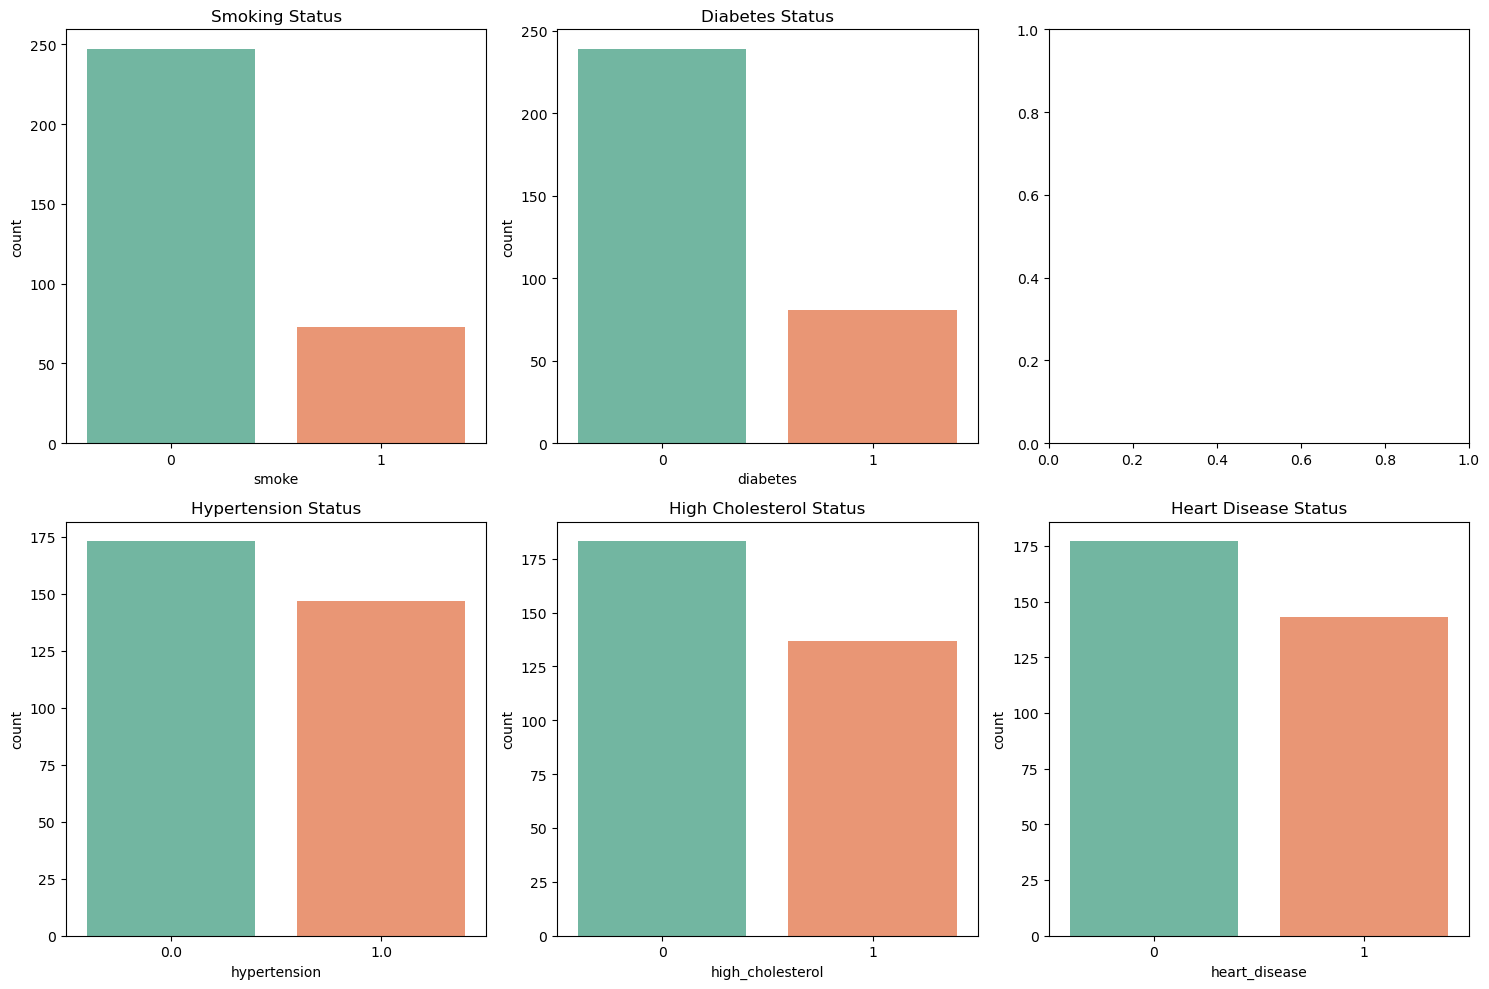

In [ ]:
# bar charts for smoke, diabetes, hypertension, high_cholesterol, heart_disease
def plot_bar_chart(df, column, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, palette='Set2')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

fix, ax = plt.subplots(2, 3, figsize=(15, 10))
sns.countplot(data=combined_df, x='smoke', ax=ax[0, 0], palette='Set2')
sns.countplot(data=combined_df, x='diabetes', ax=ax[0, 1], palette='Set2')
sns.countplot(data=combined_df, x='hypertension', ax=ax[1, 0], palette='Set2')
sns.countplot(data=combined_df, x='high_cholesterol', ax=ax[1, 1], palette='Set2')
sns.countplot(data=combined_df, x='heart_disease', ax=ax[1, 2], palette='Set2')
ax[0, 0].set_title('Smoking Status')
ax[0, 1].set_title('Diabetes Status')
ax[1, 0].set_title('Hypertension Status')
ax[1, 1].set_title('High Cholesterol Status')
ax[1, 2].set_title('Heart Disease Status')
plt.tight_layout()

Text(0, 0.5, 'Frequency')

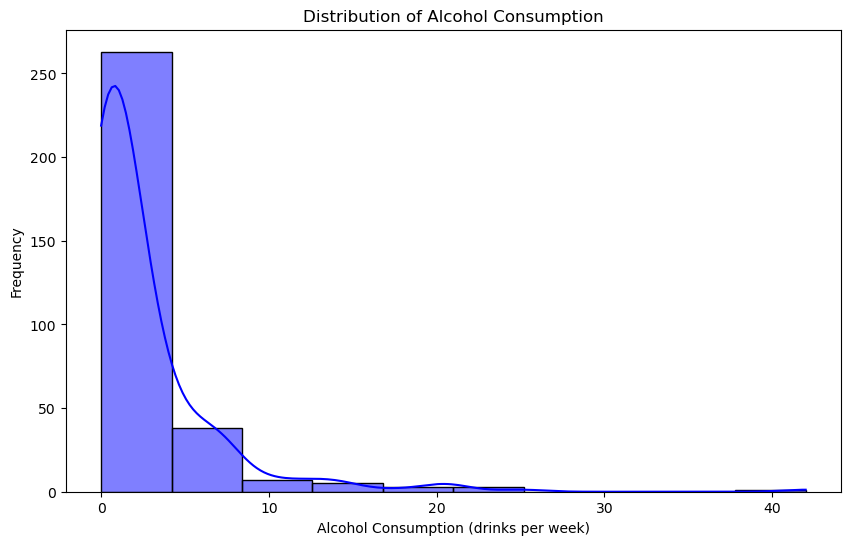

In [ ]:
''' plot distribution of liqour '''
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='liqour', bins=10, kde=True, color='blue')
plt.title('Distribution of Alcohol Consumption')
plt.xlabel('Alcohol Consumption (drinks per week)')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

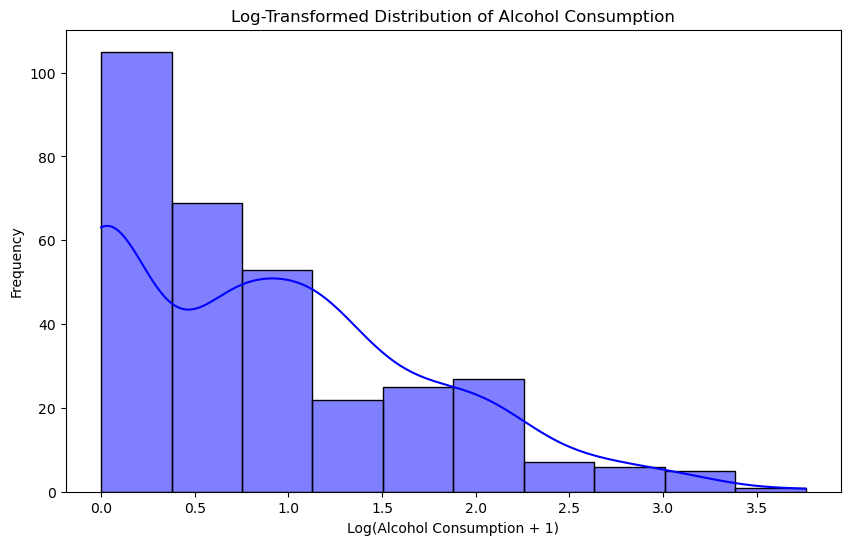

In [ ]:
# log transformation of liqour
combined_df['liqour_log'] = np.log1p(combined_df['liqour'])
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='liqour_log', bins=10, kde=True, color='blue')
plt.title('Log-Transformed Distribution of Alcohol Consumption')
plt.xlabel('Log(Alcohol Consumption + 1)')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

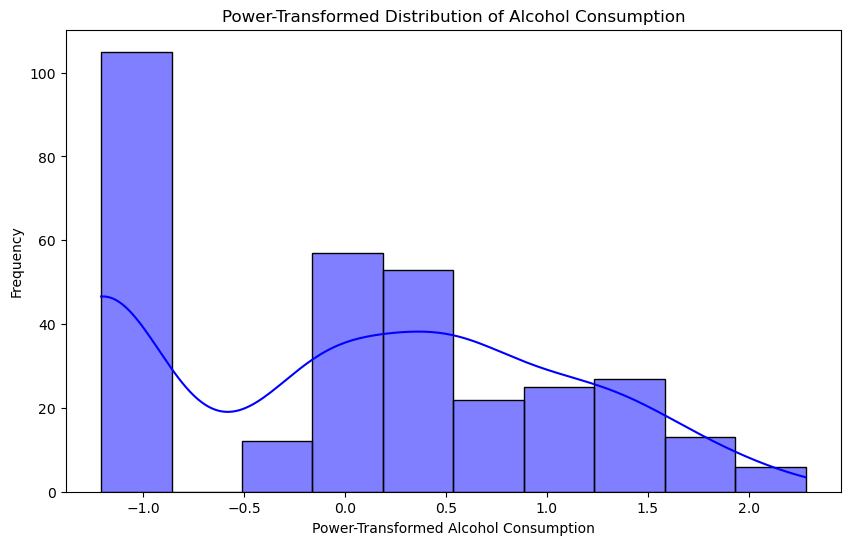

In [ ]:
# power transformation of liqour
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
combined_df['liqour_power'] = pt.fit_transform(combined_df[['liqour']])
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='liqour_power', bins=10, kde=True, color='blue')
plt.title('Power-Transformed Distribution of Alcohol Consumption')
plt.xlabel('Power-Transformed Alcohol Consumption')
plt.ylabel('Frequency')



Text(0, 0.5, 'Frequency')

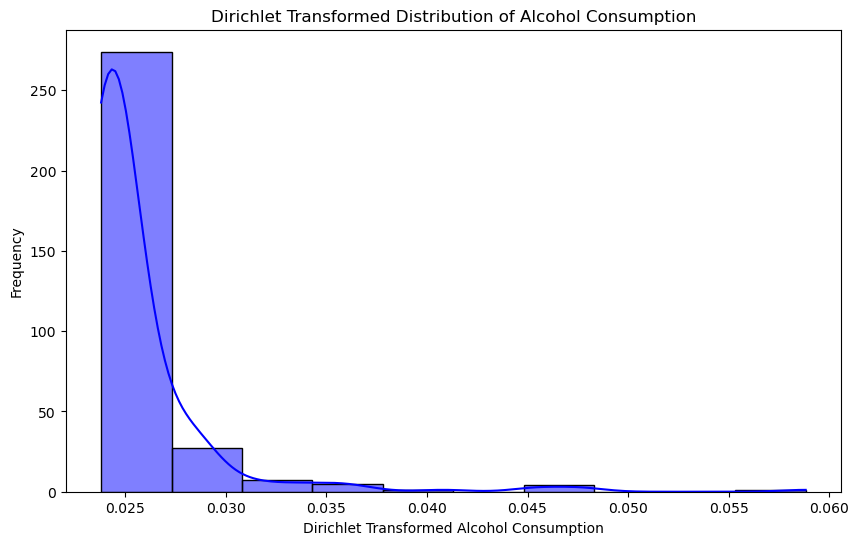

In [ ]:
''' dirichlet transform (1/D) where D is the max value of liqour '''
D = combined_df['liqour'].max()
combined_df['liqour_dirichlet'] = 1 / (D - combined_df['liqour'])
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='liqour_dirichlet', bins=10, kde=True, color='blue')
plt.title('Dirichlet Transformed Distribution of Alcohol Consumption')
plt.xlabel('Dirichlet Transformed Alcohol Consumption')
plt.ylabel('Frequency')



Text(0, 0.5, 'Frequency')

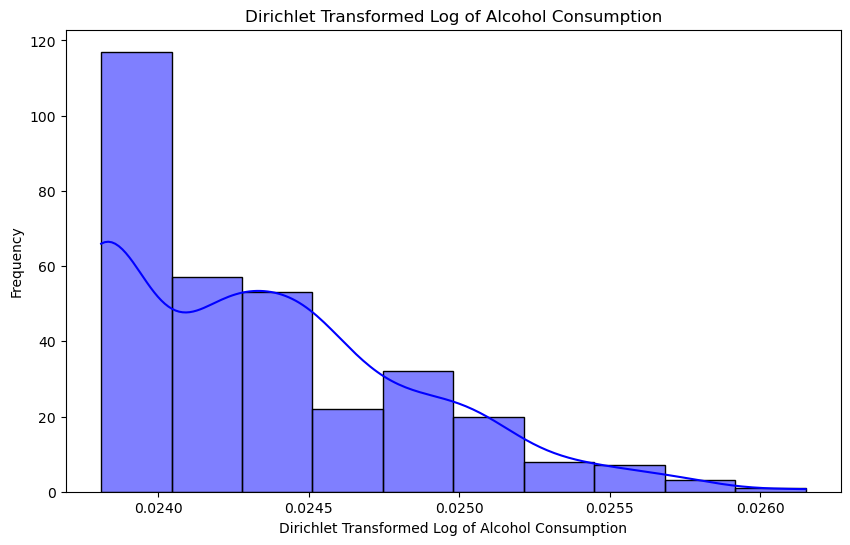

In [ ]:
''' dirichlet of log transformed liqour '''
combined_df['liqour_log_dirichlet'] = 1 / (D - combined_df['liqour_log'])
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='liqour_log_dirichlet', bins=10, kde=True, color='blue')
plt.title('Dirichlet Transformed Log of Alcohol Consumption')
plt.xlabel('Dirichlet Transformed Log of Alcohol Consumption')
plt.ylabel('Frequency')




Text(0, 0.5, 'Frequency')

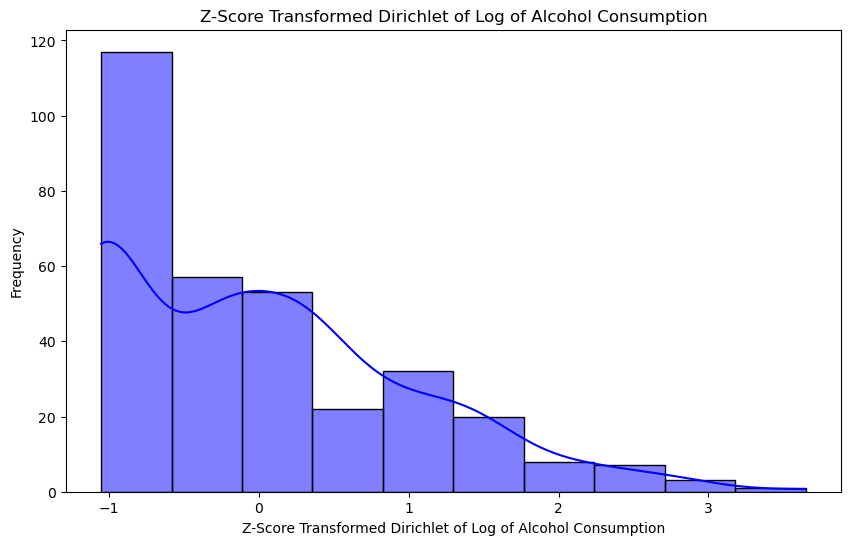

In [ ]:
''' zscore transformation of dirichlet log liqour '''
from scipy.stats import zscore
combined_df['liqour_log_dirichlet_zscore'] = zscore(combined_df['liqour_log_dirichlet'])
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='liqour_log_dirichlet_zscore', bins=10, kde=True, color='blue')
plt.title('Z-Score Transformed Dirichlet of Log of Alcohol Consumption')
plt.xlabel('Z-Score Transformed Dirichlet of Log of Alcohol Consumption')
plt.ylabel('Frequency')




' zscore, then log, then dirichlet of log '

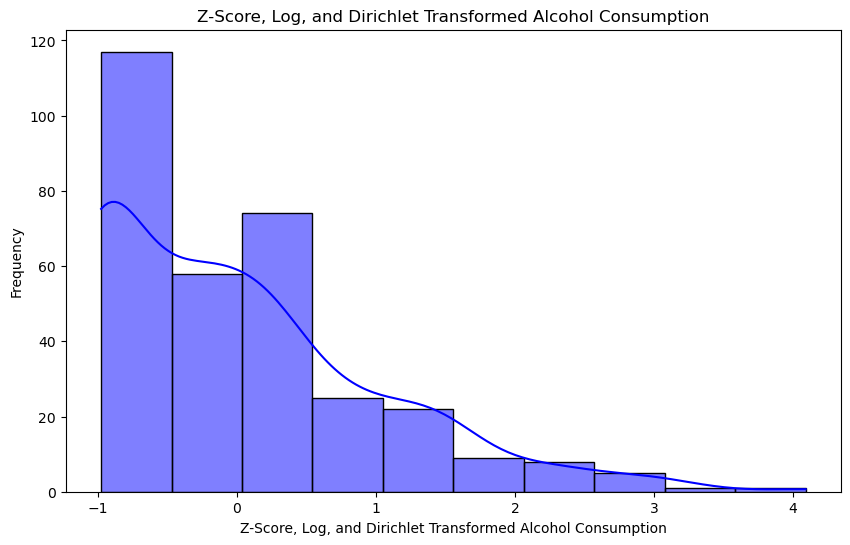

In [ ]:
''' zscore, then log, then dirichlet '''
combined_df['liqour_zscore'] = zscore(combined_df['liqour'])
combined_df['liqour_log'] = np.log1p(combined_df['liqour_zscore'])
combined_df['liqour_dirichlet'] = 1 / (D - combined_df['liqour_log'])
combined_df['liqour_dirichlet_zscore'] = zscore(combined_df['liqour_dirichlet'])
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='liqour_dirichlet_zscore', bins=10, kde=True, color='blue')
plt.title('Z-Score, Log, and Dirichlet Transformed Alcohol Consumption')
plt.xlabel('Z-Score, Log, and Dirichlet Transformed Alcohol Consumption')
plt.ylabel('Frequency')



''' zscore, then log, then dirichlet of log '''
